In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set( style="ticks" )

In [83]:
df_train = pd.read_csv("data/3_training_set_day2.csv", index_col=0)
df_test = pd.read_csv("data/4_testing_set_day2.csv", index_col=0)

train_x = df_train.drop(columns=['PRED_1', 'PRED_2'])
train_y = df_train[['PRED_1', 'PRED_2']]

test_x = df_test.drop(columns=['PRED_1', 'PRED_2'])
test_y = df_test[['PRED_1', 'PRED_2']]

In [84]:
pred = np.loadtxt("results/7_lstm_day2.csv", delimiter=',')

In [85]:
print(pred[:,0])

[154.40559775 155.97343206 156.45239839 154.10977814 153.59779518
 154.81660562 155.469937   156.74911295 156.58748137 154.60474286
 153.60527361 153.59658728 154.05209526 153.65201204 153.15978903
 151.82628733 152.51788835 152.95762188]


MSE: 0.06176949335615099
MAE: 0.04694731853300413


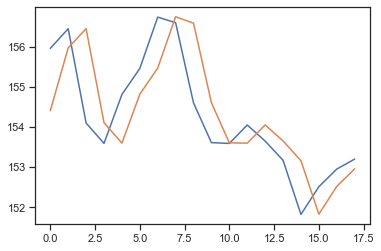

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(pred)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  y_true.append( test_y.iloc[idx][0] )
  #y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  y_pred = pred[:,0]
  

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 

MSE: 0.14420903435492002
MAE: 0.07976811204366913


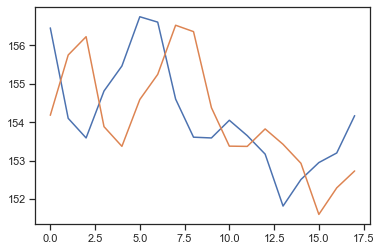

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(pred)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  y_true.append( test_y.iloc[idx][1] )
  #y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  y_pred = pred[:,1]
  

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 

MSE: 0.1111111111111111
MAE: 0.05555555555555555


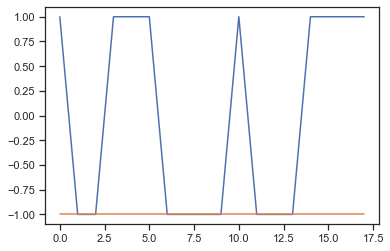

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(pred)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  y_true.append( test_y.iloc[idx][1] - test_y.iloc[idx][0] )
  #y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  y_pred = pred[:,1] - pred[:,0]
  
for i in range(len(y_true)):
  if y_true[i] > 0:
    y_true[i] = 1
  else:
    y_true[i] = -1

  if y_pred[i] > 0:
    y_pred[i] = 1
  else:
    y_pred[i] = -1

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 